## EDA & Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
water_labels = pd.read_csv('./Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_labels.csv')

In [14]:
water_values = pd.read_csv('./Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_values.csv')

In [15]:
water_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [16]:
water_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [17]:
water_pump = pd.merge(left=water_values, right=water_labels, on='id')

In [18]:
water_pump.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


### Merging two datasets together and exporting to one combined CSV

In [19]:
water_pump.to_csv('./data/water_pump_info_jp.csv', index=False)

In [20]:
water_pump.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [21]:
water_pump.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


### Examining columns and deciding what to drop initially

In [22]:
water_pump.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [23]:
water_pump.loc[:,['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name', 'num_private']]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0
...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0


In [24]:
water_pump['num_private'].unique()

array([   0,   39,    5,   45,    6,    3,  698,   32,   15,    7,   25,
        102,    1,   93,   14,   34,  120,   17,  213,   47,    8,   41,
         80,  141,   20,   35,  131,    4,   22,   11,   87,   61,   65,
        136,    2,  180,   38,   62,    9,   16,   23,   42,   24,   12,
        668,  672,   58,  150,  280,  160,   50, 1776,   30,   27,   10,
         94,   26,  450,  240,  755,   60,  111,  300,   55, 1402],
      dtype=int64)

In [25]:
water_pump.drop(columns=['longitude', 'latitude', 'num_private'], inplace=True)

In [26]:
water_pump.loc[:,['basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga','ward', 'population', 'public_meeting', 'recorded_by']]

,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by
0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd
1,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd
2,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd
3,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd
4,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd
...,...,...,...,...,...,...,...,...,...,...
59395,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd
59396,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd
59397,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd
59398,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd


In [27]:
water_pump.drop(columns=['public_meeting', 'recorded_by'], inplace=True)

In [28]:
water_pump.loc[:,['scheme_management', 'scheme_name', 'permit', 'construction_year','extraction_type', 'extraction_type_group', 'extraction_type_class']]

,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class
0,VWC,Roman,False,1999,gravity,gravity,gravity
1,Other,NaN,True,2010,gravity,gravity,gravity
2,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity
3,VWC,NaN,True,1986,submersible,submersible,submersible
4,NaN,NaN,True,0,gravity,gravity,gravity
...,...,...,...,...,...,...,...
59395,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity
59396,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity
59397,VWC,NaN,False,0,swn 80,swn 80,handpump
59398,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump


In [29]:
water_pump.drop(columns=['extraction_type_group'], inplace=True)

In [30]:
water_pump.loc[:,['management', 'management_group', 'payment', 'payment_type','water_quality', 'quality_group', 'quantity', 'quantity_group']]

,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group
0,vwc,user-group,pay annually,annually,soft,good,enough,enough
1,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient
2,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough
3,vwc,user-group,never pay,never pay,soft,good,dry,dry
4,other,other,never pay,never pay,soft,good,seasonal,seasonal
...,...,...,...,...,...,...,...,...
59395,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough
59396,vwc,user-group,pay annually,annually,soft,good,enough,enough
59397,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough
59398,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient


In [31]:
water_pump.drop(columns=['management_group', 'payment', 'quantity_group'], inplace=True)

In [32]:
water_pump.loc[:,['source', 'source_type', 'source_class', 'waterpoint_type','waterpoint_type_group', 'status_group']]

,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...
59395,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [33]:
water_pump.drop(columns=['waterpoint_type_group'], inplace=True)

In [34]:
water_pump['status_group'].value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

### Exporting cleaned CSV

In [28]:
water_pump.to_csv('./data/water_pump_info_cleaned_jp.csv', index=False)

In [35]:
water_pump.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   wpt_name               59400 non-null  object 
 7   basin                  59400 non-null  object 
 8   subvillage             59029 non-null  object 
 9   region                 59400 non-null  object 
 10  region_code            59400 non-null  int64  
 11  district_code          59400 non-null  int64  
 12  lga                    59400 non-null  object 
 13  ward                   59400 non-null  object 
 14  population             59400 non-null  int64  
 15  sc

### Modeling

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [49]:
X = water_pump.drop(columns='status_group')
y = water_pump['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [73]:
ct = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), make_column_selector(dtype_include=object)),
    (StandardScaler(), make_column_selector(dtype_include=int)),
    remainder='passthrough', verbose_feature_names_out=False
)

In [74]:
pipe1 = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    ct, LogisticRegression()
)

pipe1.fit(X_train, y_train)
pipe1.score(X_train, y_train), pipe1.score(X_test, y_test)

ValueError: make_column_selector can only be applied to pandas dataframes

### Data Cleaning/EDA

In [2]:
census = pd.read_csv('./data/Tanzania_2012_en.csv')

In [3]:
census.T

,0,1,2,3,4,5,6,7,8,9,...,60784,60785,60786,60787,60788,60789,60790,60791,60792,60793
Indicator,Children under-5 years severely underweight,Production of cement,Production of cement,Production of cement,Production of cement,Production of cement,Production of cement,Production of cement,Production of cement,Primary school net enrolment ratio,...,Pre-primary net enrolment ratio,Pre-primary net enrolment ratio,Pre-primary net enrolment ratio,Pre-primary net enrolment ratio,Pre-primary net enrolment ratio,Pre-primary net enrolment ratio,Pre-primary net enrolment ratio,Pre-primary net enrolment ratio,Pre-primary net enrolment ratio,Children aged 0-17 years living in multidimens...
Unit,Percent,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne,Percent,...,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent
Subgroup,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total,...,Total,Total,Other urban areas,Rural,Total,Total,Total,Other urban areas,Rural,Total
Area,Tanzania,Mainland,Mainland,Mainland,Mainland,Mainland,Mainland,Mainland,Mainland,Kagera,...,Zanzibar,Dar-es-Salaam,Mainland,Mainland,Mainland,Zanzibar,Dar-es-Salaam,Mainland,Mainland,Tanzania
Area ID,TZA,TZA001,TZA001,TZA001,TZA001,TZA001,TZA001,TZA001,TZA001,TZA001018,...,TZA002,TZA001007,TZA001,TZA001,TZA001,TZA002,TZA001007,TZA001,TZA001,TZA
Time Period,2015-2016,2009,2010,2011,2012,2013,2014,2007,2008,2016,...,2010-2011,2012-2013,2012-2013,2012-2013,2012-2013,2012-2013,2010-2011,2010-2011,2010-2011,2016
Source,NBS_ TDHS (2015-2016)_2016,MoFEA_Economic Survey (ES)_Yearly,MoFEA_Economic Survey (ES)_Yearly,MoFEA_Economic Survey (ES)_Yearly,MoFEA_Economic Survey (ES)_Yearly,MoFEA_Economic Survey (ES)_Yearly,MoFEA_Economic Survey (ES)_Yearly,MoFEA_Economic Survey (ES)_Yearly,MoFEA_Economic Survey (ES)_Yearly,MoE&VT_BEST_Yearly,...,MoE&VT_BEST_Yearly,MoE&VT_BEST_Yearly,MoE&VT_BEST_Yearly,MoE&VT_BEST_Yearly,MoE&VT_BEST_Yearly,MoE&VT_BEST_Yearly,MoE&VT_BEST_Yearly,MoE&VT_BEST_Yearly,MoE&VT_BEST_Yearly,NBS/UNICEF_Child Poverty in Tanzania_2016
Data Value,2.7,34793.0,2313.0,2409.0,2581.0,2369819.0,2795687.0,1630.0,1756.0,76.123234,...,28.0,61.0,43.0,22.0,28.0,37.0,53.0,38.0,20.0,74.0
Footnotes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2010-2011TZA002Total28,2012-2013TZA001007Total61,2012-2013TZA001Other urban areas43,2012-2013TZA001Rural22,2012-2013TZA001Total28,2012-2013TZA002Total37,2010-2011TZA001007Total53,2010-2011TZA001Other urban areas38,2010-2011TZA001Rural20,Child Poverty in Tanzania 2016 National Bureau...


In [4]:
census = census.set_index('Indicator').T

#### Separating out columns pertaining to water

In [5]:
census['Water coverage']

Indicator,Water coverage,Water coverage,Water coverage,Water coverage,Water coverage,Water coverage,Water coverage,Water coverage,Water coverage,Water coverage,...,Water coverage,Water coverage,Water coverage,Water coverage,Water coverage,Water coverage,Water coverage,Water coverage,Water coverage,Water coverage
Unit,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,...,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent
Subgroup,Rural,Rural,Rural,Rural,Rural,Rural,Rural,Rural,Rural,Rural,...,Rural,Rural,Rural,Rural,Rural,Rural,Rural,Rural,Rural,Rural
Area,Katavi,Kilimanjaro,Kilimanjaro,Kilimanjaro,Kilimanjaro,Kilimanjaro,Lindi,Lindi,Lindi,Lindi,...,Rukwa,Kigoma,Shinyanga,Kagera,Mwanza,Mara,Manyara,Njombe,Katavi,Geita
Area ID,TZA001023,TZA001003,TZA001003,TZA001003,TZA001003,TZA001003,TZA001008,TZA001008,TZA001008,TZA001008,...,TZA001015,TZA001016,TZA001017,TZA001018,TZA001019,TZA001020,TZA001021,TZA001022,TZA001023,TZA001025
Time Period,2012,2008,2009,2010,2011,2012,2008,2009,2010,2011,...,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012
Source,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,...,MoWI_Rural Water Supply Database_Yearly,MoWI_Rural Water Supply Database_Yearly,MoWI_Rural Water Supply Database_Yearly,MoWI_Rural Water Supply Database_Yearly,MoWI_Rural Water Supply Database_Yearly,MoWI_Rural Water Supply Database_Yearly,MoWI_Rural Water Supply Database_Yearly,MoWI_Rural Water Supply Database_Yearly,MoWI_Rural Water Supply Database_Yearly,MoWI_Rural Water Supply Database_Yearly
Data Value,53.0,68.8,69.09,68.89,73.07,74.444593,54.4,51.01,40.12,41.38,...,45.687155,59.621191,51.612049,57.206598,61.98289,49.0,62.908008,63.111356,53.0,53.008118
Footnotes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
census['Water demand']

Indicator,Water demand,Water demand,Water demand,Water demand,Water demand,Water demand,Water demand,Water demand,Water demand,Water demand,Water demand,Water demand,Water demand,Water demand,Water demand,Water demand,Water demand,Water demand,Water demand,Water demand
Unit,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr
Subgroup,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban
Area,Dar-es-Salaam,Shinyanga,Mwanza,Arusha,Dar-es-Salaam,Shinyanga,Mwanza,Arusha,Dar-es-Salaam,Shinyanga,Mwanza,Arusha,Dar-es-Salaam,Shinyanga,Mwanza,Arusha,Dar-es-Salaam,Shinyanga,Mwanza,Arusha
Area ID,TZA001007,TZA001017,TZA001019,TZA001002,TZA001007,TZA001017,TZA001019,TZA001002,TZA001007,TZA001017,TZA001019,TZA001002,TZA001007,TZA001017,TZA001019,TZA001002,TZA001007,TZA001017,TZA001019,TZA001002
Time Period,2011-2012,2011-2012,2011-2012,2012-2013,2012-2013,2012-2013,2012-2013,2013-2014,2013-2014,2013-2014,2013-2014,2009-2010,2009-2010,2009-2010,2009-2010,2010-2011,2010-2011,2010-2011,2010-2011,2011-2012
Source,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...
Data Value,181.08,6.64,42.95,34.04,189.8,6.15,40.35,35.37,189.8,6.57,37.79,19.36,164.3,6.19,25.23,19.36,181.58,6.15,37.79,34.04
Footnotes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
census['Population using an improved drinking water source']

Indicator,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source
Unit,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent
Subgroup,Rural,Rural,Total,Total,Total,Total,Urban,Urban,Rural,Total,Urban,Rural,Total,Urban,Rural,Total,Urban,Rural,Total,Urban
Area,Mainland,Mainland,Mainland,Tanzania,Mainland,Zanzibar,Mainland,Mainland,Mainland,Mainland,Mainland,Mainland,Mainland,Mainland,Mainland,Mainland,Mainland,Mainland,Mainland,Mainland
Area ID,TZA001,TZA001,TZA001,TZA,TZA001,TZA002,TZA001,TZA001,TZA001,TZA001,TZA001,TZA001,TZA001,TZA001,TZA001,TZA001,TZA001,TZA001,TZA001,TZA001
Time Period,2004-2005,2010,2004-2005,2010,2010,2010,2004-2005,2010,2000-2001,2000-2001,2000-2001,2002,2002,2002,1991-1992,1991-1992,1991-1992,2007,2007,2007
Source,NBS_ TDHS (2004-2005)_2005,NBS_ TDHS (2004-2005)_2005,NBS_ TDHS (2004-2005)_2005,NBS_ TDHS (2004-2005)_2005,NBS_ TDHS (2004-2005)_2005,NBS_ TDHS (2004-2005)_2005,NBS_ TDHS (2004-2005)_2005,NBS_ TDHS (2004-2005)_2005,NBS_Household Budget Survey (HBS) 2000-2001_2002,NBS_Household Budget Survey (HBS) 2000-2001_2002,NBS_Household Budget Survey (HBS) 2000-2001_2002,"NBS_Population and Housing Census, 2002_2003-2007","NBS_Population and Housing Census, 2002_2003-2007","NBS_Population and Housing Census, 2002_2003-2007",NBS_Household Budget Survey (HBS) 1991-1992_19...,NBS_Household Budget Survey (HBS) 1991-1992_19...,NBS_Household Budget Survey (HBS) 1991-1992_19...,NBS_Household Budget Survey (HBS) 2007_2009,NBS_Household Budget Survey (HBS) 2007_2009,NBS_Household Budget Survey (HBS) 2007_2009
Data Value,36.8,46.0,46.6,54.5,53.8,79.6,78.3,81.2,45.9,55.3,88.0,42.4,53.9,85.8,34.9,46.0,83.6,40.4,51.8,76.6
Footnotes,"TZA_ Demographic & Health Survey, 2004-2005, N...","TZA_ Demographic & Health Survey, 2004-2005, N...","TZA_ Demographic & Health Survey, 2004-2005, N...","TZA_ Demographic & Health Survey, 2004-2005, N...","TZA_ Demographic & Health Survey, 2004-2005, N...","TZA_ Demographic & Health Survey, 2004-2005, N...","TZA_ Demographic & Health Survey, 2004-2005, N...","TZA_ Demographic & Health Survey, 2004-2005, N...","TZA_Household Budget Survey (HBS) 2000-2001, N...","TZA_Household Budget Survey (HBS) 2000-2001, N...","TZA_Household Budget Survey (HBS) 2000-2001, N...","TZA_Population and Housing Census (PHC) 2002, ...","TZA_Population and Housing Census (PHC) 2002, ...","TZA_Population and Housing Census (PHC) 2002, ...","TZA_Household Budget Survey (HBS) 1991-1992, N...","TZA_Household Budget Survey (HBS) 1991-1992, N...","TZA_Household Budget Survey (HBS) 1991-1992, N...",TZA_Tanzania Household Budget Survey (HBS) 20...,TZA_Tanzania Household Budget Survey (HBS) 20...,TZA_Tanzania Household Budget Survey (HBS) 20...


In [9]:
census['Water produced in urban water supply authority']

Indicator,Water produced in urban water supply authority,Water produced in urban water supply authority,Water produced in urban water supply authority,Water produced in urban water supply authority,Water produced in urban water supply authority,Water produced in urban water supply authority,Water produced in urban water supply authority,Water produced in urban water supply authority,Water produced in urban water supply authority,Water produced in urban water supply authority,Water produced in urban water supply authority,Water produced in urban water supply authority,Water produced in urban water supply authority,Water produced in urban water supply authority,Water produced in urban water supply authority,Water produced in urban water supply authority,Water produced in urban water supply authority
Unit,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr
Subgroup,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban
Area,Dar-es-Salaam,Mwanza,Dar-es-Salaam,Mwanza,Arusha,Arusha,Mwanza,Arusha,Dar-es-Salaam,Mwanza,Arusha,Dar-es-Salaam,Mwanza,Arusha,Dar-es-Salaam,Mwanza,Arusha
Area ID,TZA001007,TZA001019,TZA001007,TZA001019,TZA001002,TZA001002,TZA001019,TZA001002,TZA001007,TZA001019,TZA001002,TZA001007,TZA001019,TZA001002,TZA001007,TZA001019,TZA001002
Time Period,2008-2009,2013-2014,2012-2013,2012-2013,2013-2014,2008-2009,2008-2009,2009-2010,2009-2010,2009-2010,2010-2011,2010-2011,2010-2011,2011-2012,2011-2012,2011-2012,2012-2013
Source,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...
Data Value,95.22,25.91,94.11,23.06,14.77,14.42,18.69,13.69,95.33,21.97,14.18,92.12,23.59,13.34,89.5,22.83,14.13
Footnotes,"TZA_Ministry of Water, Urban Water Supply Da...","TZA_Ministry of Water, Urban Water Supply Da...","TZA_Ministry of Water, Urban Water Supply Da...","TZA_Ministry of Water, Urban Water Supply Da...","TZA_Ministry of Water, Urban Water Supply Da...","TZA_Ministry of Water, Urban Water Supply Da...","TZA_Ministry of Water, Urban Water Supply Da...","TZA_Ministry of Water, Urban Water Supply Da...","TZA_Ministry of Water, Urban Water Supply Da...","TZA_Ministry of Water, Urban Water Supply Da...","TZA_Ministry of Water, Urban Water Supply Da...","TZA_Ministry of Water, Urban Water Supply Da...","TZA_Ministry of Water, Urban Water Supply Da...","TZA_Ministry of Water, Urban Water Supply Da...","TZA_Ministry of Water, Urban Water Supply Da...","TZA_Ministry of Water, Urban Water Supply Da...","TZA_Ministry of Water, Urban Water Supply Da..."


In [11]:
census['Source of improved drinking water by households']

Indicator,Source of improved drinking water by households,Source of improved drinking water by households,Source of improved drinking water by households,Source of improved drinking water by households,Source of improved drinking water by households,Source of improved drinking water by households,Source of improved drinking water by households,Source of improved drinking water by households,Source of improved drinking water by households,Source of improved drinking water by households,...,Source of improved drinking water by households,Source of improved drinking water by households,Source of improved drinking water by households,Source of improved drinking water by households,Source of improved drinking water by households,Source of improved drinking water by households,Source of improved drinking water by households,Source of improved drinking water by households,Source of improved drinking water by households,Source of improved drinking water by households
Unit,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,...,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent
Subgroup,Piped Water into dwelling,Piped Water into dwelling,Piped Water into dwelling,Piped Water into dwelling,Piped Water into dwelling,Piped Water into dwelling,Piped Water into dwelling,Piped Water into dwelling,Piped Water into dwelling,Piped Water into dwelling,...,Improved,Improved,Improved,Improved,Improved,Improved,Improved,Improved,Improved,Improved
Area,Kagera,Tarime,Mtwara,Kahama Township Authority,Lushoto,Korogwe,Muheza,Handeni,Kilindi,Uyui,...,Lindi Rural,Nachingwea,Kigoma,Liwale,Ruangwa,Lindi Urban,Babati,Hanang,Kiteto,Siha
Area ID,TZA001018,TZA001020001,TZA001009,TZA001017005,TZA001004001,TZA001004002,TZA001004003,TZA001004006,TZA001004007,TZA001014003,...,TZA001008002,TZA001008003,TZA001016,TZA001008004,TZA001008005,TZA001008006,TZA001021001,TZA001021002,TZA001021005,TZA001003007
Time Period,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012,...,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012
Source,"NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018",...,"NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018"
Data Value,2.9,1.5,8.1,17.5,5.2,5.6,10.4,13.1,2.1,0.2,...,47.9,17.2,59.1,36.8,27.5,58.5,58.5,55.4,24.7,97.4
Footnotes,"TZA_Population and Housing Census (PHC) 2012, ...","TZA_Population and Housing Census (PHC) 2012, ...","TZA_Population and Housing Census (PHC) 2012, ...","TZA_Population and Housing Census (PHC) 2012, ...","TZA_Population and Housing Census (PHC) 2012, ...","TZA_Population and Housing Census (PHC) 2012, ...","TZA_Population and Housing Census (PHC) 2012, ...","TZA_Population and Housing Census (PHC) 2012, ...","TZA_Population and Housing Census (PHC) 2012, ...","TZA_Population and Housing Census (PHC) 2012, ...",...,"TZA_Population and Housing Census (PHC) 2012, ...","TZA_Population and Housing Census (PHC) 2012, ...","TZA_Population and Housing Census (PHC) 2012, ...","TZA_Population and Housing Census (PHC) 2012, ...","TZA_Population and Housing Cen

In [20]:
census['Source of non improved drinking water by households']

Indicator,Source of non improved drinking water by households,Source of non improved drinking water by households,Source of non improved drinking water by households,Source of non improved drinking water by households,Source of non improved drinking water by households,Source of non improved drinking water by households,Source of non improved drinking water by households,Source of non improved drinking water by households,Source of non improved drinking water by households,Source of non improved drinking water by households,...,Source of non improved drinking water by households,Source of non improved drinking water by households,Source of non improved drinking water by households,Source of non improved drinking water by households,Source of non improved drinking water by households,Source of non improved drinking water by households,Source of non improved drinking water by households,Source of non improved drinking water by households,Source of non improved drinking water by households,Source of non improved drinking water by households
Unit,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,...,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent
Subgroup,Non-Improved,Non-Improved,Non-Improved,Non-Improved,Non-Improved,Non-Improved,Non-Improved,Non-Improved,Non-Improved,Non-Improved,...,Surface water (river dam lake etc.),Surface water (river dam lake etc.),Surface water (river dam lake etc.),Surface water (river dam lake etc.),Surface water (river dam lake etc.),Surface water (river dam lake etc.),Surface water (river dam lake etc.),Surface water (river dam lake etc.),Surface water (river dam lake etc.),Surface water (river dam lake etc.)
Area,Mbulu,Simanjiro,Rorya,Butiam,Kilosa,Katavi,Kilombero,Mbeya Rural,Kyela,Rungwe,...,Uvinza,Buhigwe,Kakonko,Kasulu Township Authority,Shinyanga,Shinyanga Urban,Kishapu,Shinyanga R,Kahama,Kahama Township Authority
Area ID,TZA001021003,TZA001021004,TZA001020006,TZA001020007,TZA001005001,TZA001023,TZA001005003,TZA001012002,TZA001012003,TZA001012004,...,TZA001016005,TZA001016006,TZA001016007,TZA001016008,TZA001017,TZA001017001,TZA001017002,TZA001017003,TZA001017004,TZA001017005
Time Period,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012,...,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012
Source,"NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018",...,"NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018"
Data Value,56.2,54.8,89.2,73.7,40.4,55.7,28.6,55.6,31.7,43.4,...,39.0,18.7,16.1,12.8,17.9,5.9,56.9,25.1,7.1,1.8
Footnotes,"TZA_Population and Housing Census (PHC) 2012, ...","TZA_Population and Housing Census (PHC) 2012, ...","TZA_Population and Housing Census (PHC) 2012, ...","TZA_Population and Housing Census (PHC) 2012, ...","TZA_Population and Housing Census (PHC) 2012, ...","TZA_Population and Housing Census (PHC) 2012, ...","TZA_Population and Housing Census (PHC) 2012, ...","TZA_Population and Housing Census (PHC) 2012, ...","TZA_Population and Housing Census (PHC) 2012, ...","TZA_Population and Housing Census (

In [16]:
census['Quantity sold in a crops']

Indicator,Quantity sold in a crops,Quantity sold in a crops,Quantity sold in a crops,Quantity sold in a crops,Quantity sold in a crops,Quantity sold in a crops,Quantity sold in a crops,Quantity sold in a crops,Quantity sold in a crops,Quantity sold in a crops,...,Quantity sold in a crops,Quantity sold in a crops,Quantity sold in a crops,Quantity sold in a crops,Quantity sold in a crops,Quantity sold in a crops,Quantity sold in a crops,Quantity sold in a crops,Quantity sold in a crops,Quantity sold in a crops
Unit,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne,...,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne
Subgroup,Maize Short rainy season,Maize Short rainy season,Maize Short rainy season,Maize Short rainy season,Maize Short rainy season,Maize Short rainy season,Maize Short rainy season,Maize Short rainy season,Maize Short rainy season,Maize Short rainy season,...,Pumpkins Short rainy season,Pumpkins Short rainy season,Pumpkins Short rainy season,Pumpkins Short rainy season,Pumpkins Short rainy season,Pumpkins Short rainy season,Pumpkins Short rainy season,Pumpkins Short rainy season,Pumpkins Short rainy season,Pumpkins Short rainy season
Area,Rukwa,Kigoma,Shinyanga,Kagera,Mwanza,Mara,Manyara,Njombe,Katavi,Simiyu,...,Njombe,Katavi,Simiyu,Geita,Zanzibar,Kaskazini Unguja,Kusini Unguja,Mjini Magharibi,Kaskazini Pemba,Kusini Pemba
Area ID,TZA001015,TZA001016,TZA001017,TZA001018,TZA001019,TZA001020,TZA001021,TZA001022,TZA001023,TZA001024,...,TZA001022,TZA001023,TZA001024,TZA001025,TZA002,TZA002051,TZA002052,TZA002053,TZA002054,TZA002055
Time Period,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,...,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015
Source,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,...,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015
Data Value,0.0,97700.0,71.0,59255.0,15435.0,39525.0,416.0,4705.0,0.0,19976.0,...,0.0,0.0,0.0,0.0,917.0,258.0,592.0,67.0,0.0,0.0
Footnotes,"TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...",...,"TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201..."


In [23]:
census['Quantity harvested in crops']

Indicator,Quantity harvested in crops,Quantity harvested in crops,Quantity harvested in crops,Quantity harvested in crops,Quantity harvested in crops,Quantity harvested in crops,Quantity harvested in crops,Quantity harvested in crops,Quantity harvested in crops,Quantity harvested in crops,...,Quantity harvested in crops,Quantity harvested in crops,Quantity harvested in crops,Quantity harvested in crops,Quantity harvested in crops,Quantity harvested in crops,Quantity harvested in crops,Quantity harvested in crops,Quantity harvested in crops,Quantity harvested in crops
Unit,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne,...,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne
Subgroup,Sweet Potato Short rainy season,Sweet Potato Short rainy season,Sweet Potato Short rainy season,Sweet Potato Short rainy season,Sweet Potato Short rainy season,Sweet Potato Short rainy season,Sweet Potato Short rainy season,Sweet Potato Short rainy season,Sweet Potato Short rainy season,Sweet Potato Short rainy season,...,Pumpkins Short rainy season,Pumpkins Short rainy season,Pumpkins Short rainy season,Pumpkins Short rainy season,Pumpkins Short rainy season,Pumpkins Short rainy season,Pumpkins Short rainy season,Pumpkins Short rainy season,Pumpkins Short rainy season,Pumpkins Short rainy season
Area,Lindi,Mtwara,Ruvuma,Iringa,Mbeya,Singida,Tabora,Kaskazini Unguja,Kusini Unguja,Mjini Magharibi,...,Njombe,Katavi,Simiyu,Geita,Zanzibar,Kaskazini Unguja,Kusini Unguja,Mjini Magharibi,Kaskazini Pemba,Kusini Pemba
Area ID,TZA001008,TZA001009,TZA001010,TZA001011,TZA001012,TZA001013,TZA001014,TZA002051,TZA002052,TZA002053,...,TZA001022,TZA001023,TZA001024,TZA001025,TZA002,TZA002051,TZA002052,TZA002053,TZA002054,TZA002055
Time Period,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,...,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015
Source,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,...,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015
Data Value,0.0,0.0,0.0,56.0,0.0,0.0,33787.0,2107.0,363.0,427.0,...,0.0,0.0,0.0,0.0,3100.0,660.0,2327.0,113.0,0.0,0.0
Footnotes,"TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...",...,"TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_

In [24]:
census['Population with access to piped or protected water as their main source in regional centres']

Indicator,Population with access to piped or protected water as their main source in regional centres,Population with access to piped or protected water as their main source in regional centres,Population with access to piped or protected water as their main source in regional centres,Population with access to piped or protected water as their main source in regional centres,Population with access to piped or protected water as their main source in regional centres,Population with access to piped or protected water as their main source in regional centres,Population with access to piped or protected water as their main source in regional centres,Population with access to piped or protected water as their main source in regional centres,Population with access to piped or protected water as their main source in regional centres,Population with access to piped or protected water as their main source in regional centres,...,Population with access to piped or protected water as their main source in regional centres,Population with access to piped or protected water as their main source in regional centres,Population with access to piped or protected water as their main source in regional centres,Population with access to piped or protected water as their main source in regional centres,Population with access to piped or protected water as their main source in regional centres,Population with access to piped or protected water as their main source in regional centres,Population with access to piped or protected water as their main source in regional centres,Population with access to piped or protected water as their main source in regional centres,Population with access to piped or protected water as their main source in regional centres,Population with access to piped or protected water as their main source in regional centres
Unit,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,...,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent
Subgroup,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total,...,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total
Area,Lindi,Lindi,Lindi,Manyara,Manyara,Manyara,Manyara,Manyara,Mbeya,Mbeya,...,Rukwa,Singida,Singida,Singida,Singida,Singida,Tabora,Tabora,Tabora,Tabora
Area ID,TZA001008,TZA001008,TZA001008,TZA001021,TZA001021,TZA001021,TZA001021,TZA001021,TZA001012,TZA001012,...,TZA001015,TZA001013,TZA001013,TZA001013,TZA001013,TZA001013,TZA001014,TZA001014,TZA001014,TZA001014
Time Period,2012-2013,2013-2014,2014-2015,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2010-2011,2011-2012,...,2014-2015,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2010-2011,2011-2012,2012-2013,2013-2014
Source,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,...,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly
Data Value,70.0,58.0,63.0,68.4,68.5,84.0,88.0,88.0,95.0,96.2,...,62.0,88.0,89.5,62.0,62.0,65.0,86.5,86.5,77.0,79.0
Footnotes,TZA_EWURA Water Utilities Performance Review R...,TZA_EWURA Water Utilities Performance Review R...,TZA_EWURA Water Utilities Performance Review R...,TZA_EWURA Water U

In [25]:
census['Population using an improved drinking water source']

Indicator,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source
Unit,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent
Subgroup,Rural,Rural,Total,Total,Total,Total,Urban,Urban,Rural,Total,Urban,Rural,Total,Urban,Rural,Total,Urban,Rural,Total,Urban
Area,Mainland,Mainland,Mainland,Tanzania,Mainland,Zanzibar,Mainland,Mainland,Mainland,Mainland,Mainland,Mainland,Mainland,Mainland,Mainland,Mainland,Mainland,Mainland,Mainland,Mainland
Area ID,TZA001,TZA001,TZA001,TZA,TZA001,TZA002,TZA001,TZA001,TZA001,TZA001,TZA001,TZA001,TZA001,TZA001,TZA001,TZA001,TZA001,TZA001,TZA001,TZA001
Time Period,2004-2005,2010,2004-2005,2010,2010,2010,2004-2005,2010,2000-2001,2000-2001,2000-2001,2002,2002,2002,1991-1992,1991-1992,1991-1992,2007,2007,2007
Source,NBS_ TDHS (2004-2005)_2005,NBS_ TDHS (2004-2005)_2005,NBS_ TDHS (2004-2005)_2005,NBS_ TDHS (2004-2005)_2005,NBS_ TDHS (2004-2005)_2005,NBS_ TDHS (2004-2005)_2005,NBS_ TDHS (2004-2005)_2005,NBS_ TDHS (2004-2005)_2005,NBS_Household Budget Survey (HBS) 2000-2001_2002,NBS_Household Budget Survey (HBS) 2000-2001_2002,NBS_Household Budget Survey (HBS) 2000-2001_2002,"NBS_Population and Housing Census, 2002_2003-2007","NBS_Population and Housing Census, 2002_2003-2007","NBS_Population and Housing Census, 2002_2003-2007",NBS_Household Budget Survey (HBS) 1991-1992_19...,NBS_Household Budget Survey (HBS) 1991-1992_19...,NBS_Household Budget Survey (HBS) 1991-1992_19...,NBS_Household Budget Survey (HBS) 2007_2009,NBS_Household Budget Survey (HBS) 2007_2009,NBS_Household Budget Survey (HBS) 2007_2009
Data Value,36.8,46.0,46.6,54.5,53.8,79.6,78.3,81.2,45.9,55.3,88.0,42.4,53.9,85.8,34.9,46.0,83.6,40.4,51.8,76.6
Footnotes,"TZA_ Demographic & Health Survey, 2004-2005, N...","TZA_ Demographic & Health Survey, 2004-2005, N...","TZA_ Demographic & Health Survey, 2004-2005, N...","TZA_ Demographic & Health Survey, 2004-2005, N...","TZA_ Demographic & Health Survey, 2004-2005, N...","TZA_ Demographic & Health Survey, 2004-2005, N...","TZA_ Demographic & Health Survey, 2004-2005, N...","TZA_ Demographic & Health Survey, 2004-2005, N...","TZA_Household Budget Survey (HBS) 2000-2001, N...","TZA_Household Budget Survey (HBS) 2000-2001, N...","TZA_Household Budget Survey (HBS) 2000-2001, N...","TZA_Population and Housing Census (PHC) 2002, ...","TZA_Population and Housing Census (PHC) 2002, ...","TZA_Population and Housing Census (PHC) 2002, ...","TZA_Household Budget Survey (HBS) 1991-1992, N...","TZA_Household Budget Survey (HBS) 1991-1992, N...","TZA_Household Budget Survey (HBS) 1991-1992, N...",TZA_Tanzania Household Budget Survey (HBS) 20...,TZA_Tanzania Household Budget Survey (HBS) 20...,TZA_Tanzania Household Budget Survey (HBS) 20...


In [26]:
census['Improved water source']

Indicator,Improved water source,Improved water source,Improved water source,Improved water source,Improved water source,Improved water source,Improved water source,Improved water source,Improved water source,Improved water source,Improved water source
Unit,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent
Subgroup,Total,Total,Total,Hospital,Healthy centre,Dispensary,Clinic,Government,Private for profit,Parastatal,Faith based
Area,Tanzania,Mainland,Zanzibar,Tanzania,Tanzania,Tanzania,Tanzania,Tanzania,Tanzania,Tanzania,Tanzania
Area ID,TZA,TZA001,TZA002,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA
Time Period,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015
Source,NBS_Tanzania Service Provision Assessment (TSP...,NBS_Tanzania Service Provision Assessment (TSP...,NBS_Tanzania Service Provision Assessment (TSP...,NBS_Tanzania Service Provision Assessment (TSP...,NBS_Tanzania Service Provision Assessment (TSP...,NBS_Tanzania Service Provision Assessment (TSP...,NBS_Tanzania Service Provision Assessment (TSP...,NBS_Tanzania Service Provision Assessment (TSP...,NBS_Tanzania Service Provision Assessment (TSP...,NBS_Tanzania Service Provision Assessment (TSP...,NBS_Tanzania Service Provision Assessment (TSP...
Data Value,68.0,67.0,90.0,87.0,84.0,65.0,89.0,61.0,88.0,85.0,86.0
Footnotes,TZA_Tanzania Service Provision Assessment (TSP...,TZA_Tanzania Service Provision Assessment (TSP...,TZA_Tanzania Service Provision Assessment (TSP...,TZA_Tanzania Service Provision Assessment (TSP...,TZA_Tanzania Service Provision Assessment (TSP...,TZA_Tanzania Service Provision Assessment (TSP...,TZA_Tanzania Service Provision Assessment (TSP...,TZA_Tanzania Service Provision Assessment (TSP...,TZA_Tanzania Service Provision Assessment (TSP...,TZA_Tanzania Service Provision Assessment (TSP...,TZA_Tanzania Service Provision Assessment (TSP...


In [27]:
census['Households within 1 km of drinking water in dry seasons']

Indicator,Households within 1 km of drinking water in dry seasons,Households within 1 km of drinking water in dry seasons,Households within 1 km of drinking water in dry seasons,Households within 1 km of drinking water in dry seasons,Households within 1 km of drinking water in dry seasons,Households within 1 km of drinking water in dry seasons,Households within 1 km of drinking water in dry seasons,Households within 1 km of drinking water in dry seasons,Households within 1 km of drinking water in dry seasons,Households within 1 km of drinking water in dry seasons,...,Households within 1 km of drinking water in dry seasons,Households within 1 km of drinking water in dry seasons,Households within 1 km of drinking water in dry seasons,Households within 1 km of drinking water in dry seasons,Households within 1 km of drinking water in dry seasons,Households within 1 km of drinking water in dry seasons,Households within 1 km of drinking water in dry seasons,Households within 1 km of drinking water in dry seasons,Households within 1 km of drinking water in dry seasons,Households within 1 km of drinking water in dry seasons
Unit,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,...,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent
Subgroup,Other urban areas,Rural,Rural,Rural,Rural,Rural,Rural,Rural,Rural,Rural,...,Urban,Urban,Urban,Urban,Urban,Urban,Other urban areas,Rural,Total,Total
Area,Mainland,Mbeya,Mara,Morogoro,Arusha,Mtwara,Pwani,Mwanza,Ruvuma,Rukwa,...,Iringa,Dodoma,Kigoma,Kagera,Kilimanjaro,Lindi,Mainland,Mainland,Dar-es-Salaam,Mainland
Area ID,TZA001,TZA001012,TZA001020,TZA001005,TZA001002,TZA001009,TZA001006,TZA001019,TZA001010,TZA001015,...,TZA001011,TZA001001,TZA001016,TZA001018,TZA001003,TZA001008,TZA001,TZA001,TZA001007,TZA001
Time Period,2000-2001,2000-2001,2000-2001,2000-2001,2000-2001,2000-2001,2000-2001,2000-2001,2000-2001,2000-2001,...,2000-2001,2000-2001,2000-2001,2000-2001,2000-2001,2000-2001,1991-1992,1991-1992,1991-1992,1991-1992
Source,NBS_Household Budget Survey (HBS) 2000-2001_2002,NBS_Household Budget Survey (HBS) 2000-2001_2002,NBS_Household Budget Survey (HBS) 2000-2001_2002,NBS_Household Budget Survey (HBS) 2000-2001_2002,NBS_Household Budget Survey (HBS) 2000-2001_2002,NBS_Household Budget Survey (HBS) 2000-2001_2002,NBS_Household Budget Survey (HBS) 2000-2001_2002,NBS_Household Budget Survey (HBS) 2000-2001_2002,NBS_Household Budget Survey (HBS) 2000-2001_2002,NBS_Household Budget Survey (HBS) 2000-2001_2002,...,NBS_Household Budget Survey (HBS) 2000-2001_2002,NBS_Household Budget Survey (HBS) 2000-2001_2002,NBS_Household Budget Survey (HBS) 2000-2001_2002,NBS_Household Budget Survey (HBS) 2000-2001_2002,NBS_Household Budget Survey (HBS) 2000-2001_2002,NBS_Household Budget Survey (HBS) 2000-2001_2002,NBS_Household Budget Survey (HBS) 1991-1992_19...,NBS_Household Budget Survey (HBS) 1991-1992_19...,NBS_Household Budget Survey (HBS) 1991-1992_19...,NBS_Household Budget Survey (HBS) 1991-1992_19...
Data Value,73.2,71.0,22.0,58.0,39.0,33.0,51.0,32.0,89.0,61.0,...,73.0,63.0,51.0,59.0,73.0,60.0,66.8,43.8,88.5,49.9
Footnotes,"TZA_Household Budget Survey (HBS) 2000-2001, N...","TZA_Household Budget Survey (HBS) 2000-2001, N...","TZA_Household Budget Survey (HBS) 2000-2001, N...","TZA_Household Budget Survey (HBS) 2000-2001, N...","TZA_Household Budget Survey (HBS) 2000-2001, N...","TZA_Household Budget Survey (HBS) 2000-2001, N...","TZA_Household Budget Survey (HBS) 2000-2001, N...","TZA_Household Budget Survey (HBS) 2000-2001, N...","TZA_Household Budget Survey (HBS) 2000-2001, N...","TZA_Household Budget Survey (HBS) 2000-2001, N...",...,"TZA_Household Budget Survey (HBS) 2000-2001, N...","TZA_Household Budget Survey (HBS) 2000-2001, N...","TZA_Household Budget Survey (HBS) 2000-2001, N...","TZA_Household Budget Survey (HBS) 2000-2001, N...","TZA_Household Budget Survey (HBS) 2000-2001, N...","TZA_Household Budget Survey (HBS) 2000-2001, N...","TZ

In [232]:
census_water = census.loc[:,['Water produced in urban water supply authority', 'Water demand', 'Water coverage', 
             'Source of improved drinking water by households', 'Source of non improved drinking water by households',
             'Population with access to piped or protected water as their main source in regional centres',
             'Households within 1 km of drinking water in dry seasons', 
             'Households within 15 minutes to water supply in dry seasons']]

census_water.T.loc['Water demand'].sort_values(by='Time Period')

,Unit,Subgroup,Area,Area ID,Time Period,Source,Data Value,Footnotes
Indicator,,,,,,,,
Water demand,m3/yr,Urban,Mwanza,TZA001019,2009-2010,MoWI/EWURA_Urban Water Supply Database- MajIs ...,25.23,NaN
Water demand,m3/yr,Urban,Shinyanga,TZA001017,2009-2010,MoWI/EWURA_Urban Water Supply Database- MajIs ...,6.19,NaN
Water demand,m3/yr,Urban,Dar-es-Salaam,TZA001007,2009-2010,MoWI/EWURA_Urban Water Supply Database- MajIs ...,164.3,NaN
Water demand,m3/yr,Urban,Arusha,TZA001002,2009-2010,MoWI/EWURA_Urban Water Supply Database- MajIs ...,19.36,NaN
Water demand,m3/yr,Urban,Shinyanga,TZA001017,2010-2011,MoWI/EWURA_Urban Water Supply Database- MajIs ...,6.15,NaN
Water demand,m3/yr,Urban,Dar-es-Salaam,TZA001007,2010-2011,MoWI/EWURA_Urban Water Supply Database- MajIs ...,181.58,NaN
Water demand,m3/yr,Urban,Arusha,TZA001002,2010-2011,MoWI/EWURA_Urban Water Supply Database- MajIs ...,19.36,NaN
Water demand,m3/yr,Urban,Mwanza,TZA001019,2010-2011,MoWI/EWURA_Urban Water Supply Database- MajIs ...,37.79,NaN
Water demand,m3/yr,Urban,Dar-es-Salaam,TZA001007,2011-2012,MoWI/EWURA_Urban Water Supply Database- MajIs ...,181.08,NaN


#### Columns pertaining to water, from different cleaned CSV

In [400]:
water = pd.read_csv('./data/tz_regions_water.csv', index_col='Indicator')
water = water.drop(columns='Unnamed: 0')
water_demand = water.loc['Water demand'].sort_values(by='Time Period')
water_demand.drop(columns='Footnotes', inplace=True)
water_demand

,Unit,Subgroup,Area,Area ID,Time Period,Source,Data Value
Indicator,,,,,,,
Water demand,m3/yr,Urban,Arusha,TZA001002,2009-2010,MoWI/EWURA_Urban Water Supply Database- MajIs ...,19.36
Water demand,m3/yr,Urban,Shinyanga,TZA001017,2009-2010,MoWI/EWURA_Urban Water Supply Database- MajIs ...,6.19
Water demand,m3/yr,Urban,Mwanza,TZA001019,2009-2010,MoWI/EWURA_Urban Water Supply Database- MajIs ...,25.23
Water demand,m3/yr,Urban,Arusha,TZA001002,2010-2011,MoWI/EWURA_Urban Water Supply Database- MajIs ...,19.36
Water demand,m3/yr,Urban,Shinyanga,TZA001017,2010-2011,MoWI/EWURA_Urban Water Supply Database- MajIs ...,6.15
Water demand,m3/yr,Urban,Mwanza,TZA001019,2010-2011,MoWI/EWURA_Urban Water Supply Database- MajIs ...,37.79
Water demand,m3/yr,Urban,Shinyanga,TZA001017,2011-2012,MoWI/EWURA_Urban Water Supply Database- MajIs ...,6.64
Water demand,m3/yr,Urban,Mwanza,TZA001019,2011-2012,MoWI/EWURA_Urban Water Supply Database- MajIs ...,42.95
Water demand,m3/yr,Urban,Arusha,TZA001002,2011-2012,MoWI/EWURA_Urban Water Supply Database- MajIs ...,34.04


In [407]:
water_demand_table = water_demand.pivot_table(values='Data Value', columns='Area', index='Time Period')
water_demand_table

Area,Arusha,Mwanza,Shinyanga
Time Period,,,
2009-2010,19.36,25.23,6.19
2010-2011,19.36,37.79,6.15
2011-2012,34.04,42.95,6.64
2012-2013,34.04,40.35,6.15
2013-2014,35.37,37.79,6.57


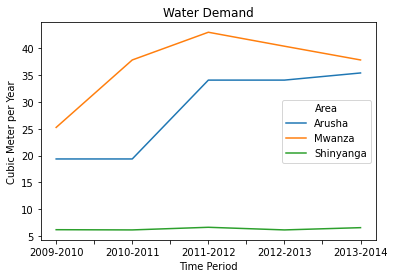

In [411]:
water_demand_table.plot()
plt.title('Water Demand')
plt.ylabel('Cubic Meter per Year');

In [266]:
water_supply = water.loc['Water produced in urban water supply authority'].sort_values(by='Time Period')
water_supply.drop(columns='Footnotes', inplace=True)
water_supply

,Unit,Subgroup,Area,Area ID,Time Period,Source,Data Value
Indicator,,,,,,,
Water produced in urban water supply authority,m3/yr,Urban,Arusha,TZA001002,2008-2009,MoWI/EWURA_Urban Water Supply Database- MajIs ...,14.42
Water produced in urban water supply authority,m3/yr,Urban,Mwanza,TZA001019,2008-2009,MoWI/EWURA_Urban Water Supply Database- MajIs ...,18.69
Water produced in urban water supply authority,m3/yr,Urban,Arusha,TZA001002,2009-2010,MoWI/EWURA_Urban Water Supply Database- MajIs ...,13.69
Water produced in urban water supply authority,m3/yr,Urban,Mwanza,TZA001019,2009-2010,MoWI/EWURA_Urban Water Supply Database- MajIs ...,21.97
Water produced in urban water supply authority,m3/yr,Urban,Arusha,TZA001002,2010-2011,MoWI/EWURA_Urban Water Supply Database- MajIs ...,14.18
Water produced in urban water supply authority,m3/yr,Urban,Mwanza,TZA001019,2010-2011,MoWI/EWURA_Urban Water Supply Database- MajIs ...,23.59
Water produced in urban water supply authority,m3/yr,Urban,Arusha,TZA001002,2011-2012,MoWI/EWURA_Urban Water Supply Database- MajIs ...,13.34
Water produced in urban water supply authority,m3/yr,Urban,Mwanza,TZA001019,2011-2012,MoWI/EWURA_Urban Water Supply Database- MajIs ...,22.83
Water produced in urban water supply authority,m3/yr,Urban,Mwanza,TZA001019,2012-2013,MoWI/EWURA_Urban Water Supply Database- MajIs ...,23.06


In [414]:
water_supply_table = water_supply.pivot_table(values='Data Value', columns='Area', index='Time Period')
water_supply_table

Area,Arusha,Mwanza
Time Period,,
2008-2009,14.42,18.69
2009-2010,13.69,21.97
2010-2011,14.18,23.59
2011-2012,13.34,22.83
2012-2013,14.13,23.06
2013-2014,14.77,25.91


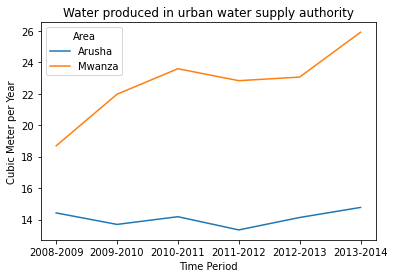

In [418]:
water_supply_table.plot()
plt.title('Water produced in urban water supply authority')
plt.ylabel('Cubic Meter per Year');

In [264]:
water_coverage = water.loc['Water coverage'].sort_values(by='Time Period')
water_coverage = water_coverage[water_coverage['Source']=='MoWI_Rural Water Supply Database_Yearly']
water_coverage.drop(columns='Footnotes', inplace=True)
water_coverage

,Unit,Subgroup,Area,Area ID,Time Period,Source,Data Value
Indicator,,,,,,,
Water coverage,Percent,Rural,Rukwa,TZA001015,2008,MoWI_Rural Water Supply Database_Yearly,51.100000
Water coverage,Percent,Rural,Dodoma,TZA001001,2008,MoWI_Rural Water Supply Database_Yearly,65.300000
Water coverage,Percent,Rural,Kilimanjaro,TZA001003,2008,MoWI_Rural Water Supply Database_Yearly,68.800000
Water coverage,Percent,Rural,Tanga,TZA001004,2008,MoWI_Rural Water Supply Database_Yearly,73.900000
Water coverage,Percent,Rural,Morogoro,TZA001005,2008,MoWI_Rural Water Supply Database_Yearly,66.200000
...,...,...,...,...,...,...,...
Water coverage,Percent,Rural,Shinyanga,TZA001017,2012,MoWI_Rural Water Supply Database_Yearly,51.612049
Water coverage,Percent,Rural,Mtwara,TZA001009,2012,MoWI_Rural Water Supply Database_Yearly,45.093115
Water coverage,Percent,Rural,Singida,TZA001013,2012,MoWI_Rural Water Supply Database_Yearly,49.886863


In [421]:
water_coverage_table = water_coverage.pivot_table(values='Data Value', columns='Area', index='Time Period', fill_value=0)
water_coverage_table

Area,Arusha,Dodoma,Geita,Iringa,Kagera,Katavi,Kigoma,Kilimanjaro,Lindi,Manyara,...,Mtwara,Mwanza,Njombe,Pwani,Rukwa,Ruvuma,Shinyanga,Singida,Tabora,Tanga
Time Period,,,,,,,,,,,,,,,,,,,,,
2008,59.600000,65.300000,0.000000,70.200000,50.500000,0,57.700000,68.800000,54.400000,53.400000,...,70.900000,58.60000,0.000000,69.100000,51.100000,56.000000,49.600000,47.400000,43.600000,73.900000
2009,66.720000,61.210000,0.000000,66.830000,58.860000,0,62.650000,69.090000,51.010000,52.540000,...,65.060000,57.02000,0.000000,65.940000,52.410000,57.730000,51.530000,49.000000,44.570000,68.900000
2010,60.840000,59.660000,0.000000,65.930000,57.850000,0,62.280000,68.890000,40.120000,52.850000,...,67.040000,61.49000,60.190000,64.800000,53.920000,57.240000,52.160000,51.360000,38.850000,65.710000
2011,58.530000,50.040000,0.000000,65.820000,56.010000,0,60.190000,73.070000,41.380000,63.010000,...,49.400000,58.28000,0.000000,64.600000,54.670000,59.910000,50.070000,50.440000,43.360000,58.230000
2012,60.663329,47.037215,53.008118,64.949601,57.206598,53,59.621191,74.444593,37.120964,62.908008,...,45.093115,61.98289,63.111356,66.082933,45.687155,58.810995,51.612049,49.886863,46.843831,59.846986


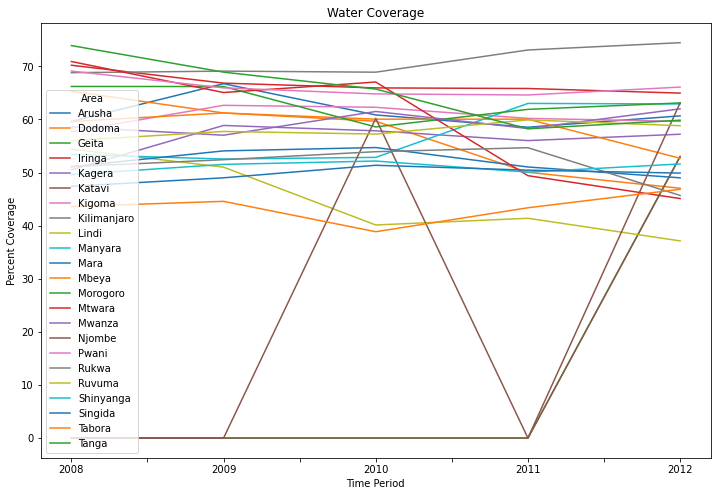

In [448]:
water_coverage_table.plot(figsize=(12,8))
plt.title('Water Coverage')
plt.ylabel('Percent Coverage');

In [325]:
water_source_improved = water.loc['Source of improved drinking water by households'].sort_values(by='Area')
water_source_improved = water_source_improved[water_source_improved['Area ID']!='TZA001002006'].sort_values(by='Area')
water_source_improved = water_source_improved[water_source_improved['Area ID']!='TZA001013002'].sort_values(by='Area')
water_source_improved = water_source_improved[water_source_improved['Area ID']!='TZA001005002'].sort_values(by='Area')
water_source_improved = water_source_improved[water_source_improved['Area ID']!='TZA001025001'].sort_values(by='Area')
water_source_improved

,Unit,Subgroup,Area,Area ID,Time Period,Source,Data Value,Footnotes
Indicator,,,,,,,,
Source of improved drinking water by households,Percent,Protected Spring,Arusha,TZA001002,2012,"NBS_Population and Housing Census, 2012_2013-2018",1.6,"TZA_Population and Housing Census (PHC) 2012, ..."
Source of improved drinking water by households,Percent,Rain water collection,Arusha,TZA001002,2012,"NBS_Population and Housing Census, 2012_2013-2018",0.3,"TZA_Population and Housing Census (PHC) 2012, ..."
Source of improved drinking water by households,Percent,Piped Water into dwelling,Arusha,TZA001002,2012,"NBS_Population and Housing Census, 2012_2013-2018",19.9,"TZA_Population and Housing Census (PHC) 2012, ..."
Source of improved drinking water by households,Percent,Tube well/ borehole,Arusha,TZA001002,2012,"NBS_Population and Housing Census, 2012_2013-2018",1.3,"TZA_Population and Housing Census (PHC) 2012, ..."
Source of improved drinking water by households,Percent,Public tap/ standpipe,Arusha,TZA001002,2012,"NBS_Population and Housing Census, 2012_2013-2018",34.2,"TZA_Population and Housing Census (PHC) 2012, ..."
...,...,...,...,...,...,...,...,...
Source of improved drinking water by households,Percent,Rain water collection,Tanga,TZA001004,2012,"NBS_Population and Housing Census, 2012_2013-2018",1.0,"TZA_Population and Housing Census (PHC) 2012, ..."
Source of improved drinking water by households,Percent,Piped Water into dwelling,Tanga,TZA001004,2012,"NBS_Population and Housing Census, 2012_2013-2018",12.0,"TZA_Population and Housing Census (PHC) 2012, ..."
Source of improved drinking water by households,Percent,Protected dug well,Tanga,TZA001004,2012,"NBS_Population and Housing Census, 2012_2013-2018",4.9,"TZA_Population and Housing Census (PHC) 2012, ..."


In [437]:
water_source_improved_table = water_source_improved.pivot_table(values='Data Value', columns='Area', index='Subgroup')
water_source_improved_table

Area,Arusha,Dodoma,Geita,Iringa,Kagera,Katavi,Kigoma,Kilimanjaro,Lindi,Manyara,...,Mwanza,Njombe,Pwani,Rukwa,Ruvuma,Shinyanga,Simiyu,Singida,Tabora,Tanga
Subgroup,,,,,,,,,,,,,,,,,,,,,
Improved,78.2,54.6,33.7,55.5,39.0,44.3,59.1,85.1,35.0,48.4,...,57.0,61.9,51.2,41.8,61.1,43.2,49.9,38.5,27.3,48.0
Piped Water into dwelling,19.9,10.7,1.4,10.2,2.9,1.7,7.7,31.9,6.2,7.4,...,12.2,13.6,11.1,6.8,12.5,8.3,3.3,4.8,3.6,12.0
Piped Water to yard/plot,17.1,6.5,0.2,9.1,3.1,0.8,5.4,23.2,2.3,5.2,...,10.9,9.4,9.9,2.1,9.7,8.5,1.4,1.8,3.1,8.9
Protected Spring,1.6,0.6,1.6,1.5,11.0,0.9,13.4,1.5,0.8,1.1,...,1.7,2.9,0.4,3.1,3.4,0.3,0.2,0.5,0.3,1.1
Protected dug well,3.8,4.0,17.5,7.1,4.8,6.8,8.7,1.3,7.8,4.0,...,9.7,5.6,9.5,7.3,10.3,11.7,17.8,7.2,11.4,4.9
Public tap/ standpipe,34.2,26.7,5.8,22.7,10.9,8.8,18.8,25.3,10.0,24.5,...,11.7,29.5,15.0,12.4,16.0,8.7,8.8,14.1,4.6,17.3
Rain water collection,0.3,0.3,0.2,0.1,2.0,0.0,0.1,0.4,2.0,0.3,...,0.2,0.1,0.6,0.0,0.0,0.3,0.2,0.3,0.1,1.0
Tube well/ borehole,1.3,5.8,7.0,4.8,4.3,25.3,5.0,1.5,5.9,5.9,...,10.6,0.8,4.7,10.1,9.2,5.4,18.2,9.8,4.2,2.8


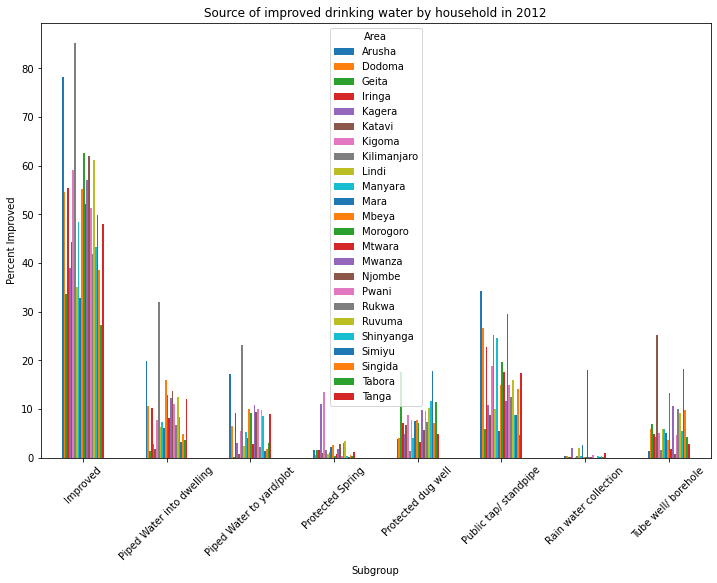

In [446]:
water_source_improved_table.plot(figsize=(12,8), kind='bar')
plt.xticks(rotation=45)
plt.ylabel('Percent Improved')
plt.title('Source of improved drinking water by household in 2012');

In [336]:
water_source_non_impr = water.loc['Source of non improved drinking water by households'].sort_values(by='Area')
water_source_non_impr = water_source_non_impr[water_source_non_impr['Area ID']!='TZA001002006'].sort_values(by='Subgroup')
water_source_non_impr = water_source_non_impr[water_source_non_impr['Area ID']!='TZA001013002'].sort_values(by='Area')
water_source_non_impr = water_source_non_impr[water_source_non_impr['Area ID']!='TZA001005002'].sort_values(by='Area')
water_source_non_impr = water_source_non_impr[water_source_non_impr['Area ID']!='TZA001025001'].sort_values(by='Area')
water_source_non_impr

,Unit,Subgroup,Area,Area ID,Time Period,Source,Data Value,Footnotes
Indicator,,,,,,,,
Source of non improved drinking water by households,Percent,Bottled water,Arusha,TZA001002,2012,"NBS_Population and Housing Census, 2012_2013-2018",0.2,"TZA_Population and Housing Census (PHC) 2012, ..."
Source of non improved drinking water by households,Percent,Cart with small tank/drum,Arusha,TZA001002,2012,"NBS_Population and Housing Census, 2012_2013-2018",2.4,"TZA_Population and Housing Census (PHC) 2012, ..."
Source of non improved drinking water by households,Percent,Unprotected dug well,Arusha,TZA001002,2012,"NBS_Population and Housing Census, 2012_2013-2018",3.0,"TZA_Population and Housing Census (PHC) 2012, ..."
Source of non improved drinking water by households,Percent,Non-Improved,Arusha,TZA001002,2012,"NBS_Population and Housing Census, 2012_2013-2018",21.8,"TZA_Population and Housing Census (PHC) 2012, ..."
Source of non improved drinking water by households,Percent,Tanker truck,Arusha,TZA001002,2012,"NBS_Population and Housing Census, 2012_2013-2018",0.3,"TZA_Population and Housing Census (PHC) 2012, ..."
...,...,...,...,...,...,...,...,...
Source of non improved drinking water by households,Percent,Bottled water,Tanga,TZA001004,2012,"NBS_Population and Housing Census, 2012_2013-2018",0.2,"TZA_Population and Housing Census (PHC) 2012, ..."
Source of non improved drinking water by households,Percent,Unprotected dug well,Tanga,TZA001004,2012,"NBS_Population and Housing Census, 2012_2013-2018",18.7,"TZA_Population and Housing Census (PHC) 2012, ..."
Source of non improved drinking water by households,Percent,Unprotected Spring,Tanga,TZA001004,2012,"NBS_Population and Housing Census, 2012_2013-2018",16.0,"TZA_Population and Housing Census (PHC) 2012, ..."


In [449]:
water_source_non_impr_table = water_source_non_impr.pivot_table(values='Data Value', columns='Area', index='Subgroup')
water_source_non_impr_table

Area,Arusha,Dodoma,Geita,Iringa,Kagera,Katavi,Kigoma,Kilimanjaro,Lindi,Manyara,...,Mwanza,Njombe,Pwani,Rukwa,Ruvuma,Shinyanga,Simiyu,Singida,Tabora,Tanga
Subgroup,,,,,,,,,,,,,,,,,,,,,
Bottled water,0.2,0.2,0.3,0.1,0.2,0.1,0.1,0.1,0.2,0.3,...,0.2,0.1,0.1,0.1,0.1,0.2,0.1,0.1,0.1,0.2
Cart with small tank/drum,2.4,5.2,5.9,1.9,0.3,2.4,2.6,1.6,1.5,6.6,...,0.7,0.1,1.2,0.4,0.0,5.0,1.1,1.5,2.2,1.2
Non-Improved,21.8,45.6,66.4,44.5,61.1,55.7,41.2,15.0,65.1,51.6,...,43.0,38.1,48.7,58.2,38.9,56.8,50.1,61.7,72.5,51.9
Surface water (river dam lake etc.),9.0,4.9,3.9,13.4,19.3,17.2,17.0,4.2,10.4,11.8,...,9.3,7.8,10.6,18.2,7.5,17.9,26.1,14.9,9.7,14.0
Tanker truck,0.3,0.3,0.1,0.1,0.1,0.1,0.2,0.2,0.6,3.4,...,0.1,0.1,1.3,0.1,0.0,0.2,0.2,0.1,0.1,1.8
Unprotected Spring,6.9,4.8,18.1,16.0,32.6,6.8,10.3,7.8,7.2,10.6,...,10.1,18.8,3.2,17.3,14.5,6.2,4.8,11.7,5.0,16.0
Unprotected dug well,3.0,30.2,38.1,13.0,8.6,29.1,11.0,1.1,45.2,18.9,...,22.6,11.2,32.3,22.1,16.8,27.3,17.8,33.4,55.4,18.7


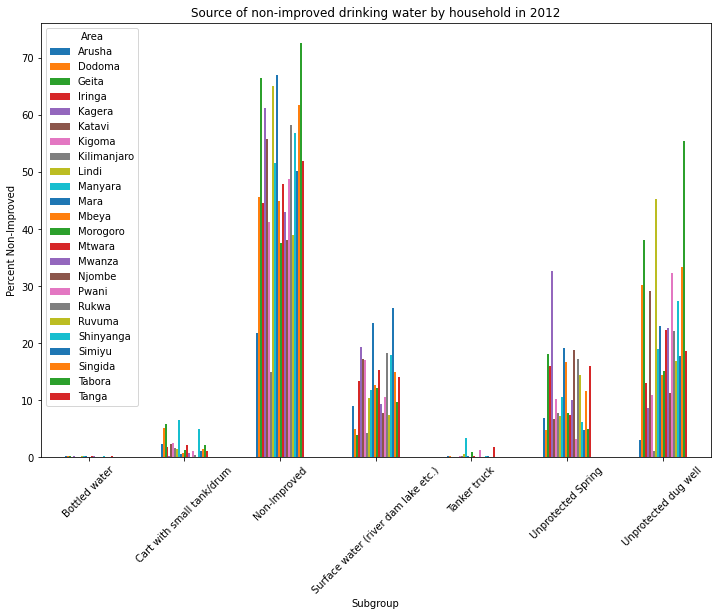

In [450]:
water_source_non_impr_table.plot(figsize=(12,8), kind='bar')
plt.xticks(rotation=45)
plt.ylabel('Percent Non-Improved')
plt.title('Source of non-improved drinking water by household in 2012');

In [301]:
water_pop = water.loc['Population with access to piped or protected water as their main source in regional centres']\
    .sort_values(by='Time Period')
water_pop = water_pop.sort_values(by='Area')
water_pop.drop(columns='Footnotes', inplace=True)
water_pop

,Unit,Subgroup,Area,Area ID,Time Period,Source,Data Value
Indicator,,,,,,,
Population with access to piped or protected water as their main source in regional centres,Percent,Total,Arusha,TZA001002,2010-2011,EWURA_Water Utilities Performance Review_Yearly,97.5
Population with access to piped or protected water as their main source in regional centres,Percent,Total,Arusha,TZA001002,2013-2014,EWURA_Water Utilities Performance Review_Yearly,82.0
Population with access to piped or protected water as their main source in regional centres,Percent,Total,Arusha,TZA001002,2012-2013,EWURA_Water Utilities Performance Review_Yearly,78.0
Population with access to piped or protected water as their main source in regional centres,Percent,Total,Arusha,TZA001002,2011-2012,EWURA_Water Utilities Performance Review_Yearly,70.4
Population with access to piped or protected water as their main source in regional centres,Percent,Total,Arusha,TZA001002,2014-2015,EWURA_Water Utilities Performance Review_Yearly,82.0
...,...,...,...,...,...,...,...
Population with access to piped or protected water as their main source in regional centres,Percent,Total,Tanga,TZA001004,2010-2011,EWURA_Water Utilities Performance Review_Yearly,92.0
Population with access to piped or protected water as their main source in regional centres,Percent,Total,Tanga,TZA001004,2013-2014,EWURA_Water Utilities Performance Review_Yearly,99.0
Population with access to piped or protected water as their main source in regional centres,Percent,Total,Tanga,TZA001004,2014-2015,EWURA_Water Utilities Performance Review_Yearly,97.0


In [452]:
water_pop_table = water_pop.pivot_table(values='Data Value', columns='Area', index='Time Period')
water_pop_table

Area,Arusha,Dodoma,Geita,Iringa,Kagera,Katavi,Kigoma,Kilimanjaro,Lindi,Manyara,...,Mtwara,Mwanza,Njombe,Rukwa,Ruvuma,Shinyanga,Simiyu,Singida,Tabora,Tanga
Time Period,,,,,,,,,,,,,,,,,,,,,
2010-2011,97.5,88.7,54.3,96.0,71.1,52.0,67.0,95.3,41.0,68.4,...,81.7,93.4,53.0,62.8,81.0,77.5,39.7,88.0,86.5,92.0
2011-2012,70.4,86.7,54.3,84.0,71.1,52.0,68.7,95.3,41.0,68.5,...,92.5,90.0,53.0,61.6,87.8,78.3,39.7,89.5,86.5,98.4
2012-2013,78.0,81.0,54.0,96.0,76.0,52.0,71.0,100.0,70.0,84.0,...,88.0,94.0,53.0,62.0,64.0,59.0,40.0,62.0,77.0,99.0
2013-2014,82.0,81.0,59.0,96.0,76.0,55.0,68.0,100.0,58.0,88.0,...,81.0,96.0,45.0,62.0,69.0,59.0,38.0,62.0,79.0,99.0
2014-2015,82.0,82.0,59.0,95.0,78.0,68.0,69.0,100.0,63.0,88.0,...,90.0,91.0,30.0,62.0,71.0,61.0,47.0,65.0,80.0,97.0


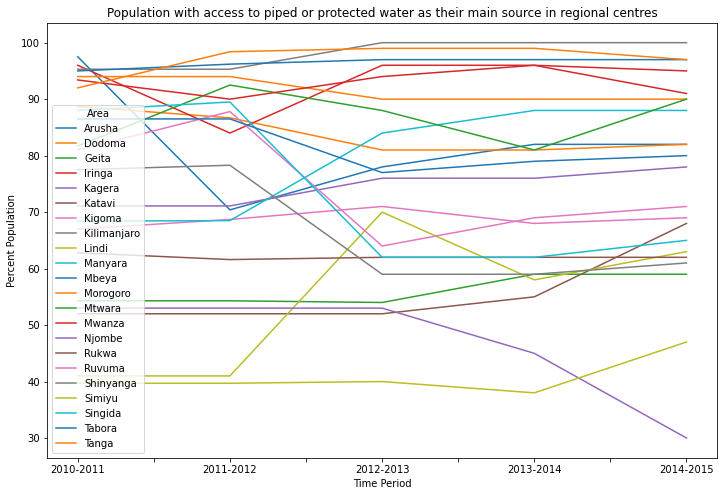

In [455]:
water_pop_table.plot(figsize=(12,8))
plt.title('Population with access to piped or protected water as their main source in regional centres')
plt.ylabel('Percent Population');

In [302]:
water_1km = water.loc['Households within 1 km of drinking water in dry seasons'].sort_values(by='Area')
water_1km = water_1km[water_1km['Subgroup']=='Total']
water_1km.drop(columns='Footnotes', inplace=True)
water_1km

,Unit,Subgroup,Area,Area ID,Time Period,Source,Data Value
Indicator,,,,,,,
Households within 1 km of drinking water in dry seasons,Percent,Total,Arusha,TZA001002,2000-2001,NBS_Household Budget Survey (HBS) 2000-2001_2002,49.0
Households within 1 km of drinking water in dry seasons,Percent,Total,Dodoma,TZA001001,2000-2001,NBS_Household Budget Survey (HBS) 2000-2001_2002,49.0
Households within 1 km of drinking water in dry seasons,Percent,Total,Iringa,TZA001011,2000-2001,NBS_Household Budget Survey (HBS) 2000-2001_2002,72.0
Households within 1 km of drinking water in dry seasons,Percent,Total,Kagera,TZA001018,2000-2001,NBS_Household Budget Survey (HBS) 2000-2001_2002,45.0
Households within 1 km of drinking water in dry seasons,Percent,Total,Kigoma,TZA001016,2000-2001,NBS_Household Budget Survey (HBS) 2000-2001_2002,55.0
Households within 1 km of drinking water in dry seasons,Percent,Total,Kilimanjaro,TZA001003,2000-2001,NBS_Household Budget Survey (HBS) 2000-2001_2002,58.0
Households within 1 km of drinking water in dry seasons,Percent,Total,Lindi,TZA001008,2000-2001,NBS_Household Budget Survey (HBS) 2000-2001_2002,47.0
Households within 1 km of drinking water in dry seasons,Percent,Total,Mara,TZA001020,2000-2001,NBS_Household Budget Survey (HBS) 2000-2001_2002,31.0
Households within 1 km of drinking water in dry seasons,Percent,Total,Mbeya,TZA001012,2000-2001,NBS_Household Budget Survey (HBS) 2000-2001_2002,75.0


In [473]:
water_1km_table = water_1km.pivot_table(values='Data Value', index='Area').sort_values(by='Area', ascending=False)
water_1km_table

,Data Value
Area,
Tanga,41.0
Tabora,54.0
Singida,51.0
Ruvuma,90.0
Rukwa,63.0
Pwani,56.0
Mwanza,40.0
Mtwara,41.0
Morogoro,61.0


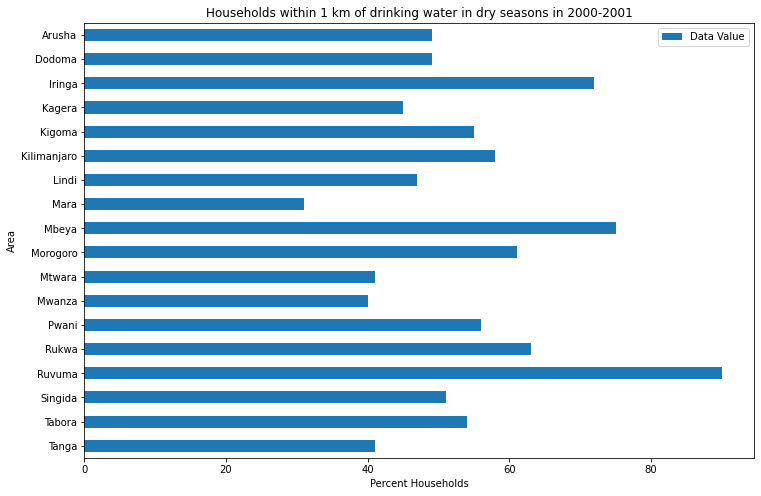

In [474]:
water_1km_table.plot(kind='barh', figsize=(12,8))
plt.title('Households within 1 km of drinking water in dry seasons in 2000-2001')
plt.xlabel('Percent Households');

In [303]:
water_15min = water.loc['Households within 15 minutes to water supply in dry seasons'].sort_values(by='Area')
water_15min.drop(columns='Footnotes', inplace=True)
water_15min

,Unit,Subgroup,Area,Area ID,Time Period,Source,Data Value
Indicator,,,,,,,
Households within 15 minutes to water supply in dry seasons,Percent,Total,Arusha,TZA001002,2000-2001,NBS_Household Budget Survey (HBS) 2000-2001_2002,65.8
Households within 15 minutes to water supply in dry seasons,Percent,Total,Dodoma,TZA001001,2000-2001,NBS_Household Budget Survey (HBS) 2000-2001_2002,71.3
Households within 15 minutes to water supply in dry seasons,Percent,Total,Iringa,TZA001011,2000-2001,NBS_Household Budget Survey (HBS) 2000-2001_2002,77.1
Households within 15 minutes to water supply in dry seasons,Percent,Total,Kagera,TZA001018,2000-2001,NBS_Household Budget Survey (HBS) 2000-2001_2002,53.8
Households within 15 minutes to water supply in dry seasons,Percent,Total,Kigoma,TZA001016,2000-2001,NBS_Household Budget Survey (HBS) 2000-2001_2002,72.5
Households within 15 minutes to water supply in dry seasons,Percent,Total,Kilimanjaro,TZA001003,2000-2001,NBS_Household Budget Survey (HBS) 2000-2001_2002,61.8
Households within 15 minutes to water supply in dry seasons,Percent,Total,Lindi,TZA001008,2000-2001,NBS_Household Budget Survey (HBS) 2000-2001_2002,67.3
Households within 15 minutes to water supply in dry seasons,Percent,Total,Mara,TZA001020,2000-2001,NBS_Household Budget Survey (HBS) 2000-2001_2002,51.1
Households within 15 minutes to water supply in dry seasons,Percent,Total,Mbeya,TZA001012,2000-2001,NBS_Household Budget Survey (HBS) 2000-2001_2002,77.5


In [475]:
water_15min_table = water_15min.pivot_table(values='Data Value', index='Area').sort_values(by='Area', ascending=False)
water_15min_table

,Data Value
Area,
Tanga,53.7
Tabora,60.1
Singida,68.4
Ruvuma,88.3
Rukwa,69.7
Pwani,67.3
Mwanza,55.0
Mtwara,44.1
Morogoro,70.7


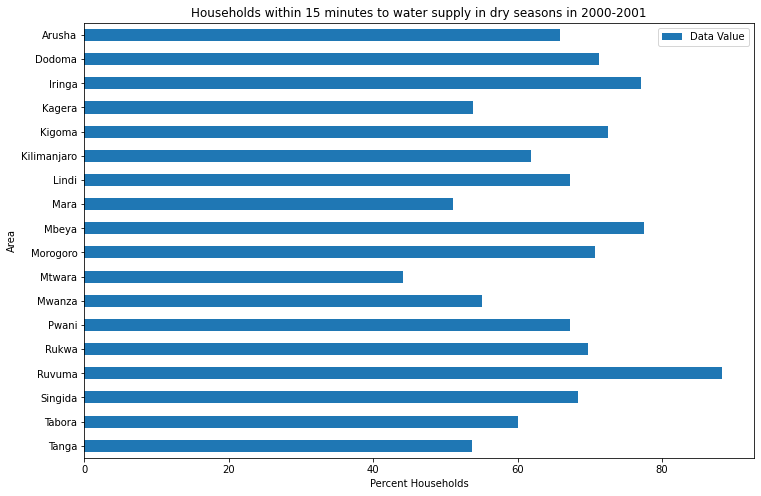

In [476]:
water_15min_table.plot(kind='barh', figsize=(12,8))
plt.title('Households within 15 minutes to water supply in dry seasons in 2000-2001')
plt.xlabel('Percent Households');

#### Separating out columns pertaining to health

In [34]:
census_health = census.loc[:,['Urine protein', 'Projected infant mortality rate', 'Projected life expectancy at birth',
             'Population with disability', 'Post neonatal mortality rate',
             'Population 7 years and above, with difficulty in cognition',
             'Population 7 years and above, with difficulty in communication',
             'Population 7 years and above, with difficulty in hearing',
             'Population 7 years and above, with difficulty in mobility',
             'Population 7 years and above, with difficulty in seeing',
             'Deworming coverage', 'Children under-5 years with diarrhoea',
             'Children under-5 years with diarrhoea taken to a health facility/provider',
             'Children under-5 years who drink more fluids during diarrhoea',
             'Children under-5 years who given ORS and zinc during diarrhoea',
             'Children under-5 years who receive any ORT for diarrhoea', 'Children under-5 years with fever']]

census_health

Indicator,Urine protein,Urine protein,Urine protein,Urine protein,Urine protein,Urine protein,Urine protein,Urine protein,Urine protein,Urine protein,...,Children under-5 years with fever,Children under-5 years with fever,Children under-5 years with fever,Children under-5 years with fever,Children under-5 years with fever,Children under-5 years with fever,Children under-5 years with fever,Children under-5 years with fever,Children under-5 years with fever,Children under-5 years with fever
Unit,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,...,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent
Subgroup,Total,Total,Total,Hospital,Healthy centre,Dispensary,Clinic,Government,Private for profit,Parastatal,...,Urban,Female,Male,Rural,Rural,Total,Total,Total,Urban,Urban
Area,Tanzania,Mainland,Zanzibar,Tanzania,Tanzania,Tanzania,Tanzania,Tanzania,Tanzania,Tanzania,...,Mainland,Tanzania,Tanzania,Tanzania,Mainland,Tanzania,Mainland,Zanzibar,Tanzania,Mainland
Area ID,TZA,TZA001,TZA002,TZA,TZA,TZA,TZA,TZA,TZA,TZA,...,TZA001,TZA,TZA,TZA,TZA001,TZA,TZA001,TZA002,TZA,TZA001
Time Period,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,...,2004-2005,1999,1999,1999,1999,1999,1999,1999,1999,1999
Source,NBS_Tanzania Service Provision Assessment (TSP...,NBS_Tanzania Service Provision Assessment (TSP...,NBS_Tanzania Service Provision Assessment (TSP...,NBS_Tanzania Service Provision Assessment (TSP...,NBS_Tanzania Service Provision Assessment (TSP...,NBS_Tanzania Service Provision Assessment (TSP...,NBS_Tanzania Service Provision Assessment (TSP...,NBS_Tanzania Service Provision Assessment (TSP...,NBS_Tanzania Service Provision Assessment (TSP...,NBS_Tanzania Service Provision Assessment (TSP...,...,NBS_ TDHS (2004-2005)_2005,NBS_Tanzania Reproductive and Child Health Sur...,NBS_Tanzania Reproductive and Child Health Sur...,NBS_Tanzania Reproductive and Child Health Sur...,NBS_Tanzania Reproductive and Child Health Sur...,NBS_Tanzania Reproductive and Child Health Sur...,NBS_Tanzania Reproductive and Child Health Sur...,NBS_Tanzania Reproductive and Child Health Sur...,NBS_Tanzania Reproductive and Child Health Sur...,NBS_Tanzania Reproductive and Child Health Sur...
Data Value,27.0,27.0,38.0,83.0,65.0,20.0,29.0,17.0,58.0,32.0,...,22.3,33.7,36.5,35.5,35.4,35.1,35.0,38.6,33.4,33.6
Footnotes,TZA_Tanzania Service Provision Assessment (TSP...,TZA_Tanzania Service Provision Assessment (TSP...,TZA_Tanzania Service Provision Assessment (TSP...,TZA_Tanzania Service Provision Assessment (TSP...,TZA_Tanzania Service Provision Assessment (TSP...,TZA_Tanzania Service Provision Assessment (TSP...,TZA_Tanzania Service Provision Assessment (TSP...,TZA_Tanzania Service Provision Assessment (TSP...,TZA_Tanzania Service Provision Assessment (TSP...,TZA_Tanzania Service Provision Assessment (TSP...,...,"TZA_ Demographic & Health Survey, 2004-2005, N...",TZA_Tanzania Reproductive and Child Health Sur...,TZA_Tanzania Reproductive and Child Health Sur...,TZA_Tanzania Reproductive and Child Health Sur...,TZA_Tanzania Reproductive and Child Health Sur...,TZA_Tanzania Reproductive and Child Health Sur...,TZA_Tanzania Reproductive and Child Health Sur...,TZA_Tanzania Reproductive and Child Health Sur...,TZA_Tanzania Reproductive and Child Health Sur...,TZA_Tanzania Reproductive and Child Health Sur...


In [67]:
census_health_tanzania = census_health.T[census_health.T['Area'] == 'Tanzania']
census_health_tanzania

,Unit,Subgroup,Area,Area ID,Time Period,Source,Data Value,Footnotes
Indicator,,,,,,,,
Urine protein,Percent,Total,Tanzania,TZA,2014-2015,NBS_Tanzania Service Provision Assessment (TSP...,27.0,TZA_Tanzania Service Provision Assessment (TSP...
Urine protein,Percent,Hospital,Tanzania,TZA,2014-2015,NBS_Tanzania Service Provision Assessment (TSP...,83.0,TZA_Tanzania Service Provision Assessment (TSP...
Urine protein,Percent,Healthy centre,Tanzania,TZA,2014-2015,NBS_Tanzania Service Provision Assessment (TSP...,65.0,TZA_Tanzania Service Provision Assessment (TSP...
Urine protein,Percent,Dispensary,Tanzania,TZA,2014-2015,NBS_Tanzania Service Provision Assessment (TSP...,20.0,TZA_Tanzania Service Provision Assessment (TSP...
Urine protein,Percent,Clinic,Tanzania,TZA,2014-2015,NBS_Tanzania Service Provision Assessment (TSP...,29.0,TZA_Tanzania Service Provision Assessment (TSP...
...,...,...,...,...,...,...,...,...
Children under-5 years with fever,Percent,Female,Tanzania,TZA,1999,NBS_Tanzania Reproductive and Child Health Sur...,33.7,TZA_Tanzania Reproductive and Child Health Sur...
Children under-5 years with fever,Percent,Male,Tanzania,TZA,1999,NBS_Tanzania Reproductive and Child Health Sur...,36.5,TZA_Tanzania Reproductive and Child Health Sur...
Children under-5 years with fever,Percent,Rural,Tanzania,TZA,1999,NBS_Tanzania Reproductive and Child Health Sur...,35.5,TZA_Tanzania Reproductive and Child Health Sur...


In [73]:
census_health_mainland = census_health.T[census_health.T['Area'] == 'Mainland']
census_health_mainland

,Unit,Subgroup,Area,Area ID,Time Period,Source,Data Value,Footnotes
Indicator,,,,,,,,
Urine protein,Percent,Total,Mainland,TZA001,2014-2015,NBS_Tanzania Service Provision Assessment (TSP...,27.0,TZA_Tanzania Service Provision Assessment (TSP...
Projected infant mortality rate,"Deaths per 1,000 live births",Total,Mainland,TZA001,2014,"NBS_Population and Housing Census, 2012_2013-2018",40.7,"TZA_National Projections, 2018, National Burea..."
Projected infant mortality rate,"Deaths per 1,000 live births",Total,Mainland,TZA001,2015,"NBS_Population and Housing Census, 2012_2013-2018",38.5,"TZA_National Projections, 2018, National Burea..."
Projected infant mortality rate,"Deaths per 1,000 live births",Total,Mainland,TZA001,2016,"NBS_Population and Housing Census, 2012_2013-2018",36.5,"TZA_National Projections, 2018, National Burea..."
Projected infant mortality rate,"Deaths per 1,000 live births",Total,Mainland,TZA001,2017,"NBS_Population and Housing Census, 2012_2013-2018",34.5,"TZA_National Projections, 2018, National Burea..."
...,...,...,...,...,...,...,...,...
Children under-5 years with fever,Percent,Total,Mainland,TZA001,2004-2005,NBS_ TDHS (2004-2005)_2005,24.2,"TZA_ Demographic & Health Survey, 2004-2005, N..."
Children under-5 years with fever,Percent,Urban,Mainland,TZA001,2004-2005,NBS_ TDHS (2004-2005)_2005,22.3,"TZA_ Demographic & Health Survey, 2004-2005, N..."
Children under-5 years with fever,Percent,Rural,Mainland,TZA001,1999,NBS_Tanzania Reproductive and Child Health Sur...,35.4,TZA_Tanzania Reproductive and Child Health Sur...


In [102]:
census_health_zanzibar = census_health.T[census_health.T['Area'] == 'Zanzibar']
census_health_zanzibar

,Unit,Subgroup,Area,Area ID,Time Period,Source,Data Value,Footnotes
Indicator,,,,,,,,
Urine protein,Percent,Total,Zanzibar,TZA002,2014-2015,NBS_Tanzania Service Provision Assessment (TSP...,38.0,TZA_Tanzania Service Provision Assessment (TSP...
Projected infant mortality rate,"Deaths per 1,000 live births",Total,Zanzibar,TZA002,2014,"NBS_Population and Housing Census, 2012_2013-2018",36.5,"TZA_National Projections, 2018, National Burea..."
Projected infant mortality rate,"Deaths per 1,000 live births",Total,Zanzibar,TZA002,2015,"NBS_Population and Housing Census, 2012_2013-2018",34.7,"TZA_National Projections, 2018, National Burea..."
Projected infant mortality rate,"Deaths per 1,000 live births",Total,Zanzibar,TZA002,2016,"NBS_Population and Housing Census, 2012_2013-2018",33.0,"TZA_National Projections, 2018, National Burea..."
Projected infant mortality rate,"Deaths per 1,000 live births",Total,Zanzibar,TZA002,2017,"NBS_Population and Housing Census, 2012_2013-2018",31.3,"TZA_National Projections, 2018, National Burea..."
...,...,...,...,...,...,...,...,...
Children under-5 years who given ORS and zinc during diarrhoea,Percent,Total,Zanzibar,TZA002,2015-2016,NBS_ TDHS (2015-2016)_2016,28.7,"TZA_ Demographic & Health Survey, 2015-2016, N..."
Children under-5 years who receive any ORT for diarrhoea,Percent,Total,Zanzibar,TZA002,2004-2005,NBS_ TDHS (2004-2005)_2005,59.7,"TZA_ Demographic & Health Survey, 2004-2005, N..."
Children under-5 years who receive any ORT for diarrhoea,Percent,Total,Zanzibar,TZA002,1991-1992,NBS_TDHS (1991-1992)_1993,68.9,"TZA_Demographic & Health Survey, 1991-1992, Na..."


In [105]:
census_health_subarea = census_health.loc[:,['Deworming coverage', 'Children under-5 years with diarrhoea', 
                     'Children under-5 years who drink more fluids during diarrhoea']].T

census_health_subarea

,Unit,Subgroup,Area,Area ID,Time Period,Source,Data Value,Footnotes
Indicator,,,,,,,,
Deworming coverage,Percent,By Card,Tanzania,TZA,2014,TFNC_Tanzania National Nutrition Survey 2014_2014,25.1,TZA_Tanzania National Nutrition Survey _2014
Deworming coverage,Percent,By Card,Mainland,TZA001,2014,TFNC_Tanzania National Nutrition Survey 2014_2014,25.4,TZA_Tanzania National Nutrition Survey _2014
Deworming coverage,Percent,By Card,Dodoma,TZA001001,2014,TFNC_Tanzania National Nutrition Survey 2014_2014,0.0,TZA_Tanzania National Nutrition Survey _2014
Deworming coverage,Percent,By Card,Arusha,TZA001002,2014,TFNC_Tanzania National Nutrition Survey 2014_2014,20.4,TZA_Tanzania National Nutrition Survey _2014
Deworming coverage,Percent,By Card,Kilimanjaro,TZA001003,2014,TFNC_Tanzania National Nutrition Survey 2014_2014,23.1,TZA_Tanzania National Nutrition Survey _2014
...,...,...,...,...,...,...,...,...
Children under-5 years who drink more fluids during diarrhoea,Percent,Male,Tanzania,TZA,1999,NBS_Tanzania Reproductive and Child Health Sur...,34.0,TZA_Tanzania Reproductive and Child Health Sur...
Children under-5 years who drink more fluids during diarrhoea,Percent,Rural,Tanzania,TZA,1999,NBS_Tanzania Reproductive and Child Health Sur...,32.4,TZA_Tanzania Reproductive and Child Health Sur...
Children under-5 years who drink more fluids during diarrhoea,Percent,Rural,Mainland,TZA001,1999,NBS_Tanzania Reproductive and Child Health Sur...,32.2,TZA_Tanzania Reproductive and Child Health Sur...


In [145]:
census_health_diarrhoea = census_health_subarea.T['Children under-5 years with diarrhoea'].T[['Subgroup', 'Area', 'Time Period', 'Data Value']].sort_values(by='Area')
census_health_diarrhoea

,Subgroup,Area,Time Period,Data Value
Indicator,,,,
Children under-5 years with diarrhoea,Total,Arusha,2004-2005,10.8
Children under-5 years with diarrhoea,Total,Arusha,1996,14.8
Children under-5 years with diarrhoea,Total,Arusha,1991-1992,23.3
Children under-5 years with diarrhoea,Total,Arusha,2010,12.6
Children under-5 years with diarrhoea,Total,Arusha,2015-2016,9.2
...,...,...,...,...
Children under-5 years with diarrhoea,Total,Zanzibar,2004-2005,13.6
Children under-5 years with diarrhoea,Total,Zanzibar,2015-2016,10.5
Children under-5 years with diarrhoea,Total,Zanzibar,2010,11.3


In [173]:
census_health_total_diar = census_health_diarrhoea[census_health_diarrhoea['Subgroup'] == 'Total']
census_health_total_diar

,Subgroup,Area,Time Period,Data Value
Indicator,,,,
Children under-5 years with diarrhoea,Total,Arusha,2004-2005,10.8
Children under-5 years with diarrhoea,Total,Arusha,1996,14.8
Children under-5 years with diarrhoea,Total,Arusha,1991-1992,23.3
Children under-5 years with diarrhoea,Total,Arusha,2010,12.6
Children under-5 years with diarrhoea,Total,Arusha,2015-2016,9.2
...,...,...,...,...
Children under-5 years with diarrhoea,Total,Zanzibar,2004-2005,13.6
Children under-5 years with diarrhoea,Total,Zanzibar,2015-2016,10.5
Children under-5 years with diarrhoea,Total,Zanzibar,2010,11.3


In [132]:
census_health_diarrhoea['Area'].value_counts()

Mainland            38
Tanzania            33
Arusha               6
Dar-es-Salaam        6
Tanga                6
Tabora               6
Singida              6
Shinyanga            6
Ruvuma               6
Rukwa                6
Pwani                6
Mwanza               6
Mtwara               6
Morogoro             6
Mbeya                6
Mara                 6
Zanzibar             6
Kigoma               6
Dodoma               6
Iringa               6
Kagera               6
Kilimanjaro          6
Lindi                6
Manyara              4
Kaskazini Unguja     3
Kaskazini Pemba      3
Kusini Pemba         3
Kusini Unguja        3
Mjini Magharibi      3
Njombe               1
Simiyu               1
Geita                1
Katavi               1
Name: Area, dtype: int64

In [66]:
census_health.T['Area'].value_counts()

Tanzania            345
Mainland            260
Zanzibar            159
Iringa               12
Mara                 12
Mwanza               12
Kagera               12
Shinyanga            12
Kigoma               12
Rukwa                12
Singida              12
Mbeya                12
Tabora               12
Ruvuma               12
Mtwara               12
Lindi                12
Dar-es-Salaam        12
Pwani                12
Morogoro             12
Tanga                12
Kilimanjaro          12
Arusha               12
Dodoma               12
Manyara               9
Kaskazini Unguja      8
Kusini Unguja         8
Mjini Magharibi       8
Kaskazini Pemba       8
Kusini Pemba          8
Njombe                6
Katavi                6
Simiyu                6
Geita                 6
Name: Area, dtype: int64